In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Admission_Predict_Ver1.1.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset.index.name = None
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [5]:
dataset['Chance of Admit '].median()

0.72

In [6]:
data=dataset.copy()

In [7]:
data.drop(['Serial No.'], axis=1, inplace=True)

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

C:\Users\Sanya Jain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sanya Jain\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


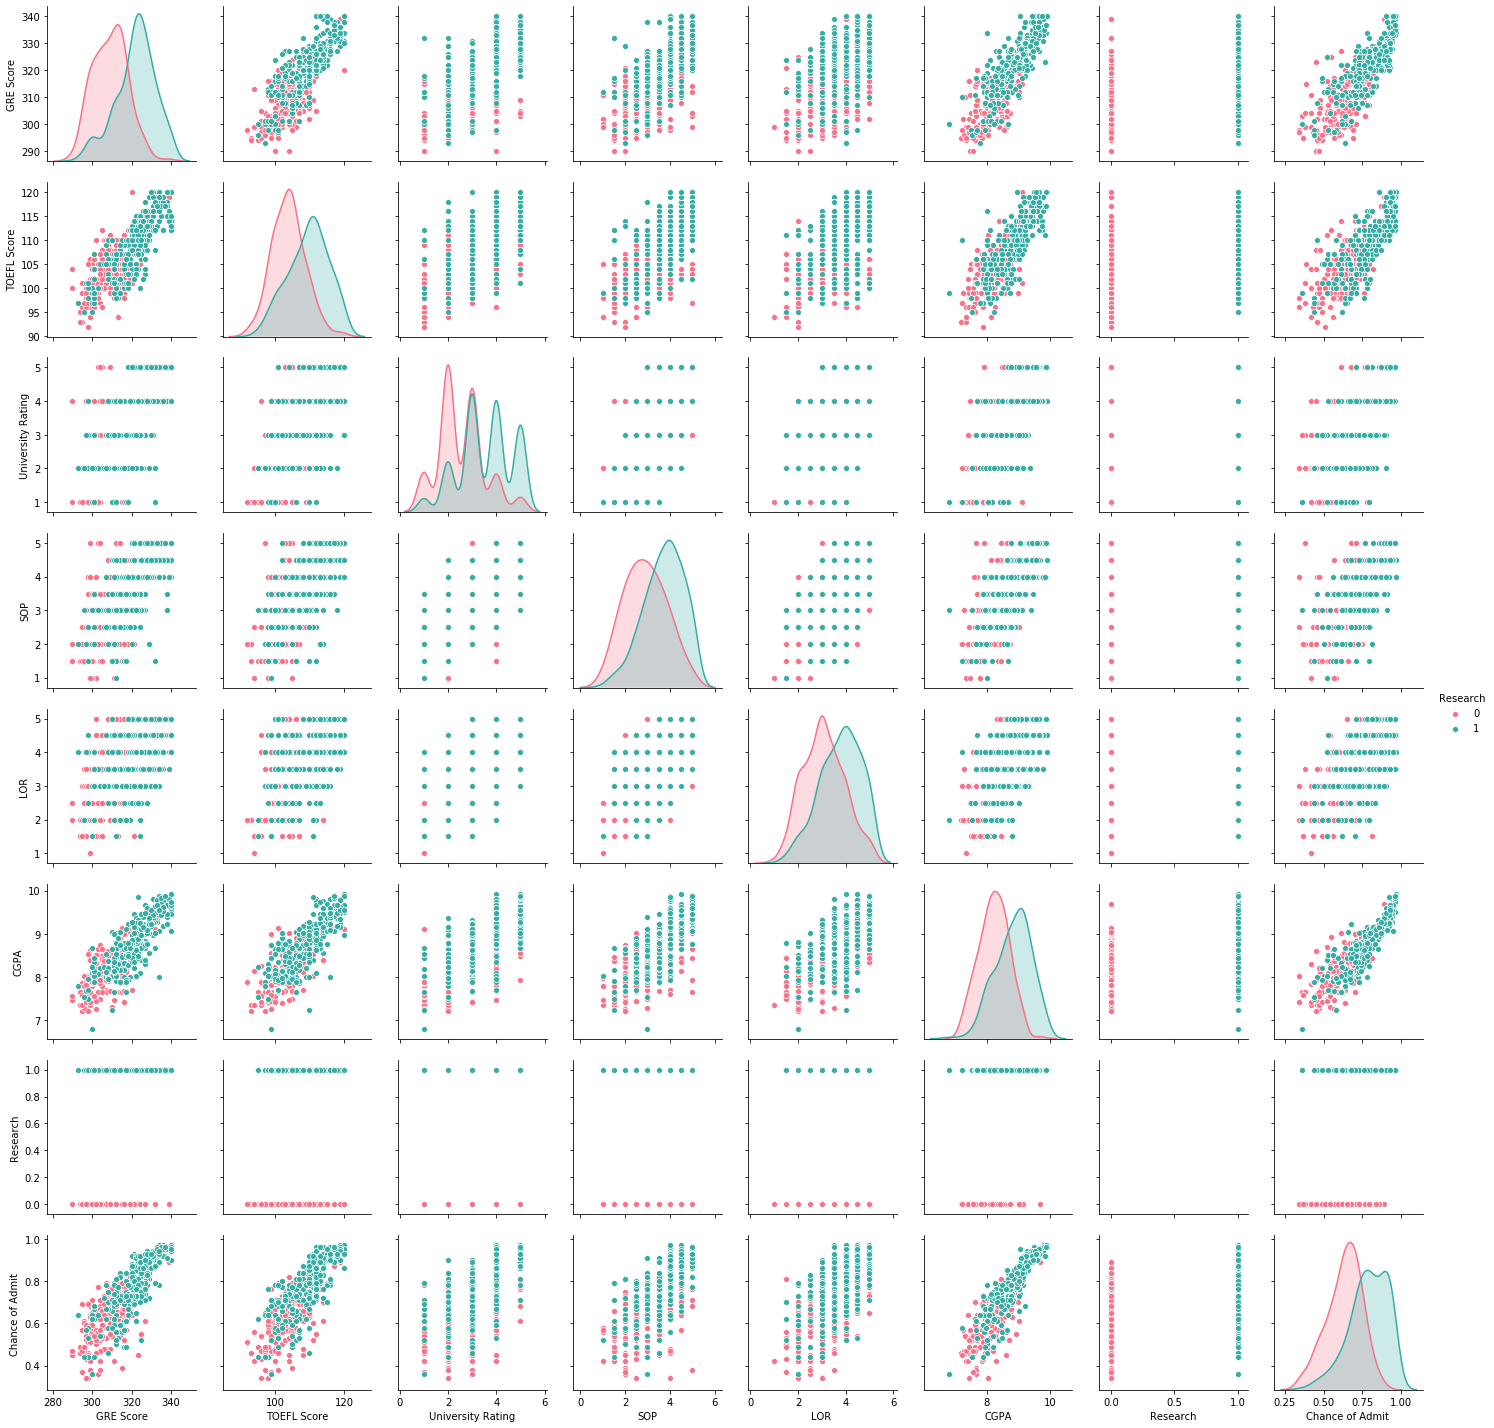

In [11]:
sns.pairplot(data, hue='Research', palette='husl')

In [12]:
y=data.corr()
y

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


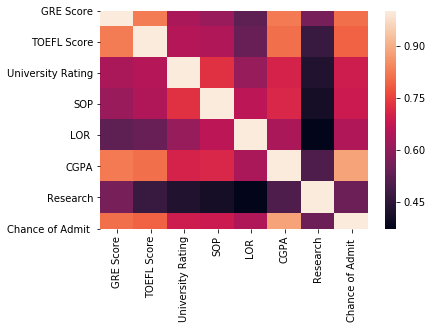

In [13]:
sns.heatmap(y)

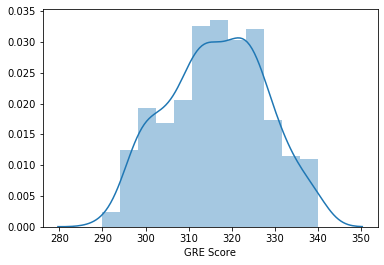

In [14]:
sns.distplot(data['GRE Score']) #no outliers

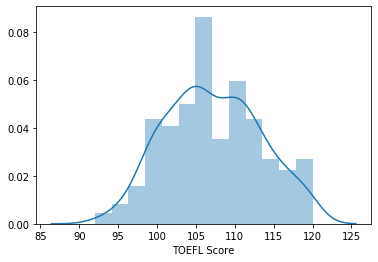

In [15]:
sns.distplot(data['TOEFL Score']) #no outliers

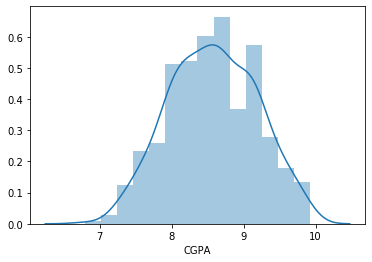

In [16]:
sns.distplot(data['CGPA'])#no outliers

Text(0.5, 1.0, 'CGPA and Chance of Admit')

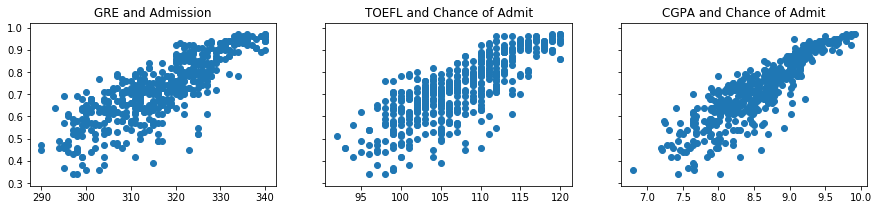

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data['GRE Score'],data['Chance of Admit '])
ax1.set_title('GRE and Admission')
ax2.scatter(data['TOEFL Score'],data['Chance of Admit '])
ax2.set_title('TOEFL and Chance of Admit')
ax3.scatter(data['CGPA'],data['Chance of Admit '])
ax3.set_title('CGPA and Chance of Admit')
#f.suptitle("Plots of Chance of Admission vs [CGPA, GRE, TOEFL]")

In [18]:
df=data.copy()

In [19]:
df['Chance of Admit '].median()

0.72

In [20]:
targets=np.where(df['Chance of Admit ']>df['Chance of Admit '].median(),1,0)
targets

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [21]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [22]:
unscaleddata=df.iloc[:, 0:7]
unscaleddata

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
admission=StandardScaler()

In [25]:
admission.fit(unscaleddata)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_inputs=admission.transform(unscaleddata)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_test_split(scaled_inputs,targets)

[array([[ 0.66714832,  0.95592621,  0.77558214, ...,  0.55812525,
          0.35345462, -1.12815215],
        [ 1.73061537,  1.94345329,  1.65095702, ...,  0.01730621,
          2.02506527,  0.88640526],
        [-0.39631872, -1.18371579, -0.97516761, ...,  0.01730621,
         -1.11954882,  0.88640526],
        ...,
        [-0.92805224,  0.46216267, -0.97516761, ...,  0.55812525,
         -0.20926579, -1.12815215],
        [-0.13045196, -1.18371579, -1.85054249, ..., -1.06433187,
         -1.03679582, -1.12815215],
        [ 1.55337086,  1.44968975,  0.77558214, ...,  0.01730621,
          1.59474966,  0.88640526]]),
 array([[-0.0418297 , -0.36077656, -0.97516761, -0.88281747, -1.06433187,
         -0.6230308 ,  0.88640526],
        [-0.75080773, -1.01912795, -0.97516761, -0.37777315,  0.55812525,
         -1.11954882, -1.12815215],
        [ 1.55337086,  1.94345329,  1.65095702,  1.13735981,  1.09894429,
          1.49544606,  0.88640526],
        [-1.45978576, -0.8545401 , -0.09979

In [29]:
x_train, x_test, y_train, y_test=train_test_split(scaled_inputs,targets, train_size=0.8, random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
reg=LogisticRegression()

In [32]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_hat = reg.predict(x_train)
y_hat

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [34]:
y_hat.shape

(400,)

In [35]:
x_train.shape

(400, 7)

In [36]:
unscaleddata.shape

(500, 7)

In [37]:
z=reg.coef_
z


array([[1.00451196, 0.36024244, 0.30474456, 0.46314879, 0.18312232,
        1.61335968, 0.47818491]])

In [38]:
reg.score(x_train,y_train)

0.8725

In [39]:
reg.intercept_

array([0.04286786])

In [40]:
unscaleddata.columns.values # since scaled_inputs is an ndarray and we cannot use ndarry in pd so use
#unscaleddata as after standardization transforms into ndarrays

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research'], dtype=object)

In [41]:
unscaleddata.columns.values.shape

(7,)

In [42]:
z.T 

array([[1.00451196],
       [0.36024244],
       [0.30474456],
       [0.46314879],
       [0.18312232],
       [1.61335968],
       [0.47818491]])

In [43]:
reg_summary = pd.DataFrame(unscaleddata.columns.values, columns=['Features']) 
reg_summary['Weights']=z.T # it was imp to transpose otherwise error occurred
reg_summary

,Features,Weights
0,GRE Score,1.004512
1,TOEFL Score,0.360242
2,University Rating,0.304745
3,SOP,0.463149
4,LOR,0.183122
5,CGPA,1.613360
6,Research,0.478185


In [44]:
y_hat==y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,

In [45]:
np.sum(y_hat==y_train)


349

In [46]:
y_hat.shape

(400,)

In [47]:
x_train.shape

(400, 7)

In [48]:
targets.shape

(500,)

In [49]:
y_train.shape

(400,)

In [50]:
y_test.shape

(100,)

In [51]:
x_test.shape

(100, 7)

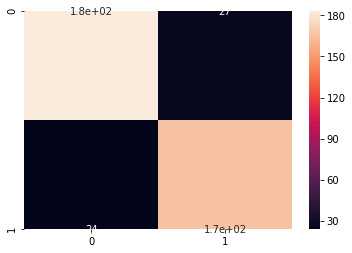

In [52]:
lr_mat = metrics.confusion_matrix(y_hat,y_train)
sns.heatmap(lr_mat,annot=True)

In [53]:
print(metrics.classification_report(y_hat,y_train)) #Precision — Also called Positive predictive value. 
#The ratio of correct positive predictions to the total predicted positives. Recall — Also called Sensitivity, 
# Probability of Detection, True Positive Rate. 
#The ratio of correct positive predictions to the total positives examples
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives
#and false negatives into account. 
#Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy.

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       210
           1       0.86      0.87      0.87       190

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

